In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [2]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.1307,), (0.3081,)),
                                ])

trainset = datasets.MNIST('data', download=True, train=True, transform=transform)
testset = datasets.MNIST('data', download=True, train=False, transform=transform)

trainloader = DataLoader(trainset, batch_size=64, shuffle=True, num_workers=4)
testloader = DataLoader(testset, batch_size=100, shuffle=True, num_workers=4)

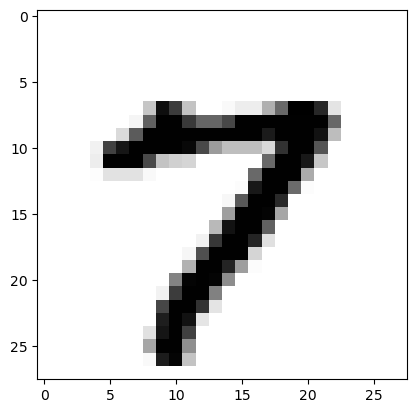

In [3]:
plt.imshow(trainset[5555][0].numpy().squeeze(), cmap='gray_r')

In [4]:
for data, label in trainloader:
    print(data.shape)
    print(label.shape)
    break

torch.Size([64, 1, 28, 28])
torch.Size([64])


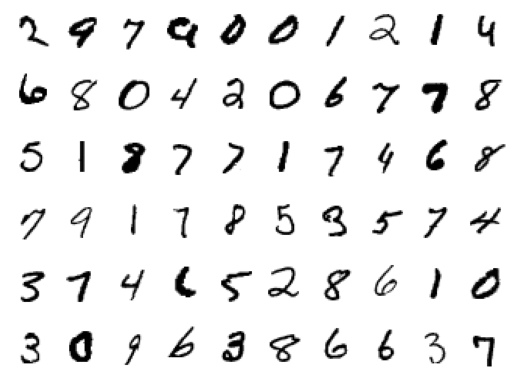

In [5]:

for data, label in trainloader:
    for i, num in enumerate(data):
        if i >= 60:
            break
        plt.subplot(6, 10, i+1)
        plt.axis('off')
        plt.imshow(num.numpy().squeeze(), cmap='gray_r')
    break

In [6]:
class mnist_net(nn.Module):
    def __init__(self):
        super(mnist_net, self).__init__()
        self.fc1 = nn.Linear(784, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10)
    
    def forward(self, x):
        x = x.view(-1, 784)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = torch.log_softmax(self.fc4(x), dim=1)
        return x

In [7]:
print(mnist_net())

mnist_net(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=64, bias=True)
  (fc4): Linear(in_features=64, out_features=10, bias=True)
)


In [14]:
model = mnist_net()
criterion = nn.NLLLoss()

epochs = 20
learning_rate = 0.005

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
time0 = time()

for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        images = images.view(images.shape[0], -1)

        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)

        loss.backward()

        optimizer.step()

        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, running_loss/len(trainloader)))

print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 0 - Training loss: 0.5155998687269782
Epoch 1 - Training loss: 0.14661783060190012
Epoch 2 - Training loss: 0.09533422684042787
Epoch 3 - Training loss: 0.06958473661342568
Epoch 4 - Training loss: 0.053435528079724945
Epoch 5 - Training loss: 0.03982505425853011
Epoch 6 - Training loss: 0.03171462354294684
Epoch 7 - Training loss: 0.02404414421753652
Epoch 8 - Training loss: 0.018706411837933035
Epoch 9 - Training loss: 0.014350938859480326
Epoch 10 - Training loss: 0.010489588504085342
Epoch 11 - Training loss: 0.007909485127658709
Epoch 12 - Training loss: 0.0055624617452384225
Epoch 13 - Training loss: 0.003460330866835993
Epoch 14 - Training loss: 0.002040556208425408
Epoch 15 - Training loss: 0.0013290428307483574
Epoch 16 - Training loss: 0.0010202050285648522
Epoch 17 - Training loss: 0.0007942484428241596
Epoch 18 - Training loss: 0.0006951883500139546
Epoch 19 - Training loss: 0.0006102078990417274

Training Time (in minutes) = 2.121146297454834


In [15]:
def accuracy(model, testloader):
    correct_count, all_count = 0, 0
    for images, labels in testloader:
        for i in range(len(labels)):
            img = images[i].view(1, 784)
            with torch.no_grad():
                logps = model(img)
            
            ps = torch.exp(logps)
            probab = list(ps.numpy()[0])
            pred_label = probab.index(max(probab))
            true_label = labels.numpy()[i]
            if true_label == pred_label:
                correct_count += 1
            all_count += 1
    return correct_count / all_count

print("\nModel Accuracy =", accuracy(model, testloader))



Model Accuracy = 0.9826


In [11]:
torch.save(model, './mnist_net.pth')